<a href="https://colab.research.google.com/github/almazius/Almaz/blob/main/laba_4_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("sample_data/cannabis.csv")
data.head(10)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina..."


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2277 non-null   object 
 1   Type         2277 non-null   object 
 2   Rating       2277 non-null   float64
 3   Effects      2277 non-null   object 
 4   Flavor       2277 non-null   object 
 5   Description  2277 non-null   object 
dtypes: float64(1), object(5)
memory usage: 124.5+ KB


Гипотеза:
Большинство сортов сативы делает человека креативным

In [ ]:
data['Type'].value_counts()

hybrid    1169
indica     680
sativa     428
Name: Type, dtype: int64

In [ ]:
for type in data['Type'].unique():
  counter = 0
  for effects in data[data['Type'] == type]['Effects']:
    if 'Creative' in effects:
      counter += 1
  print(f'Тип {type} имеет {counter} эпизодов повышения креативности.')

Тип hybrid имеет 409 эпизодов повышения креативности.
Тип sativa имеет 186 эпизодов повышения креативности.
Тип indica имеет 124 эпизодов повышения креативности.


In [ ]:
print(f'Процентное соотношение гибрида: {round(409/1169*100,2)} %')
print(f'Процентное соотношение индики: {round(186/680*100,2)} %')
print(f'Процентное соотношение сативы: {round(124/428*100, 2)} %')


Процентное соотношение гибрида: 34.99 %
Процентное соотношение индики: 27.35 %
Процентное соотношение сативы: 28.97 %


Статистическая гипотеза оказалась неверной. Эффект "Креативность" преимущественно присутствует у сорта "hybrid". 

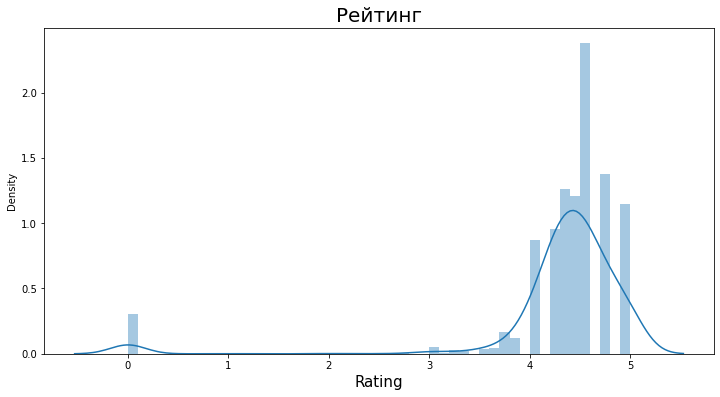

In [ ]:
plt.figure(figsize=(12,6))

#Total rating distribuition
g = sns.distplot(data["Rating"],
                 bins=50)
g.set_title("Рейтинг", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

На графике распределения рейтинга видно, что почти все сорты каннабиса имеют рейтинг выше 4

In [ ]:
pd.crosstab(data[data.Rating > 3.0]['Rating'], data.Type).T

Rating,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Type,,,,,,,,,,,,,,,,,,,,
hybrid,1,1,2,2,5,6,7,9,9,62,56,113,150,144,164,114,95,88,31,102
indica,0,2,0,1,2,4,5,10,12,24,33,64,89,83,94,78,47,41,19,70
sativa,0,0,1,2,2,1,4,4,8,18,12,48,58,57,59,50,22,30,9,38


Поскольку более 50% штаммов являются гибридами, мы можем видеть, что гибриды доминируют почти во всех рейтинговых значениях.

In [ ]:
df_effect = pd.DataFrame(data.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(data.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [ ]:
data = pd.concat([data, df_effect], axis=1)
data = pd.concat([data, df_flavors], axis=1)

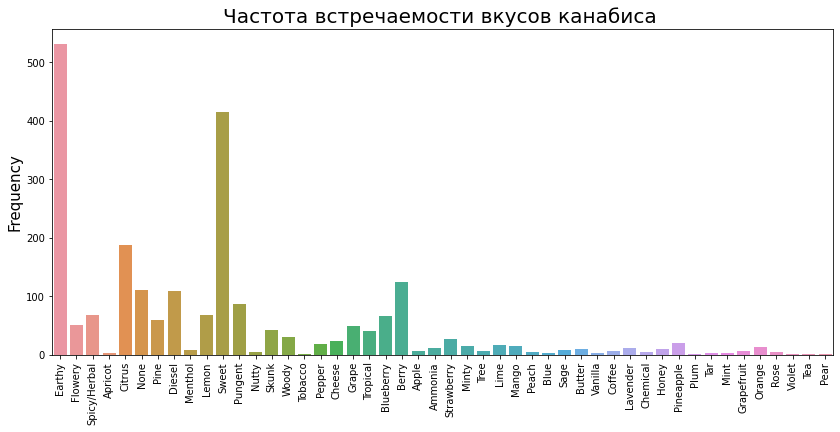

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=data)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("Частота встречаемости вкусов канабиса ",
          fontsize=20)
plt.show()

Реузьтатом данной диаграммы является то, что вкус "Earthly" наиболее частовстречаемый.